# Binary SVM on Spiral Data
Import the data and libraries. Generate the data set.

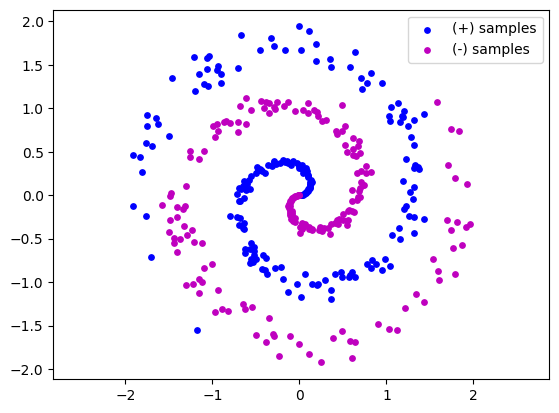

In [1]:
from math import pi
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate the spiral data set
# Source: https://ngilshie.github.io/jekyll/update/2018/02/01/RKHS.html
N = 200                            # 200 points per class 
X = np.zeros(shape=(N*2, 2))       # dummy dataset 
y = np.repeat([0, 1], repeats=N)   # true class labels 
radius0 = np.linspace(0, 2, N)     # radius and angle for blue spiral 
theta0 = np.linspace(0, 3*pi, N) + np.linspace(0, 0.7, N)*np.random.randn(N)
radius1 = np.linspace(0, 2, N)     # radius and angle for pink spiral 
theta1 = np.linspace(pi, 4*pi, N) + np.linspace(0, 0.7, N)*np.random.randn(N)
radius, theta = np.concatenate([radius0, radius1]), np.concatenate([theta0, theta1])
X[:, 0] = radius * np.cos(theta)   # x1-coordinate 
X[:, 1] = radius * np.sin(theta)   # x2-coordinate 

plt.scatter(X[y == 0,0],X[y == 0,1],color='b',s=15) # Plot positive samples
plt.scatter(X[y == 1,0],X[y == 1,1],color='m',s=15) # Plot negative samples
plt.legend(('(+) samples','(-) samples'))
plt.axis('equal')
plt.show()

### Train the SVM binary classifier with Standard Scaling then report accuracy

In [2]:
model = make_pipeline(StandardScaler(),
                      SVC(C=5,kernel='rbf',gamma=1)).fit(X,y)
print(f"accuracy = {model.score(X, y)}")
print('Confusion Matrix')
print(confusion_matrix(y, model.predict(X)))

accuracy = 0.98
Confusion Matrix
[[200   0]
 [  8 192]]


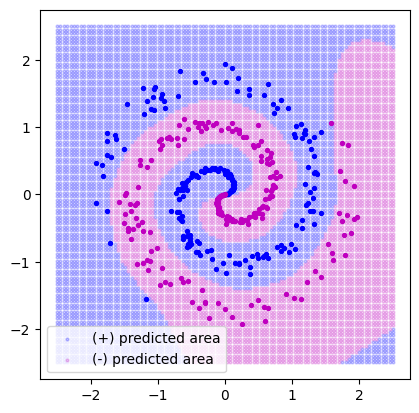

In [3]:
def visualizeRegion(axlim,model):
    nx, ny = (100,100)
    xv, yv = np.meshgrid(np.linspace(axlim[0],axlim[1],nx), 
                         np.linspace(axlim[2],axlim[3],ny))
    xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
    grid = np.hstack((xv,yv))
    ypred = model.predict(grid)
    plt.scatter(xv[ypred == 0],yv[ypred == 0],
                color='b', alpha=0.2, s=4,
                label='(+) predicted area')
    plt.scatter(xv[ypred == 1],yv[ypred == 1],
                color='m', alpha=0.2, s=4,
                label='(-) predicted area')
    plt.axis(axlim)
    
visualizeRegion(np.array([-2.5, 2.5, -2.5, 2.5]),model)
plt.scatter(X[y == 0,0],X[y == 0,1], s=8, color='b') # Plot positive samples
plt.scatter(X[y == 1,0],X[y == 1,1], s=8, color='m') # Plot negative samples
plt.legend(loc='lower left')
plt.axis('image')
plt.show()

As we can see, Kernel SVM is a powerful classifier. It can learn nonlinear decision boundaries as intricate as the one in the example.

## Other ways to plot decision boundaries

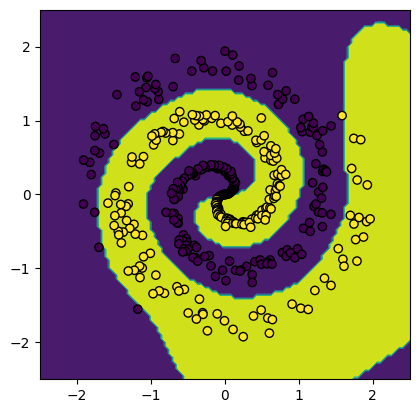

In [4]:
from sklearn.inspection import DecisionBoundaryDisplay

axlim = np.array([-2.5, 2.5, -2.5, 2.5])
nx, ny = (100,100)
xv, yv = np.meshgrid(np.linspace(axlim[0],axlim[1],nx), 
                     np.linspace(axlim[2],axlim[3],ny))
grid = np.vstack([xv.ravel(), yv.ravel()]).T
ypred = np.reshape(model.predict(grid), xv.shape)
display = DecisionBoundaryDisplay(xx0=xv, xx1=yv, response=ypred)
display.plot()
display.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor="k")
plt.axis('image')
plt.show()

(-2.415229518919829, 2.462309917488875, -2.423989368821467, 2.439697807125598)

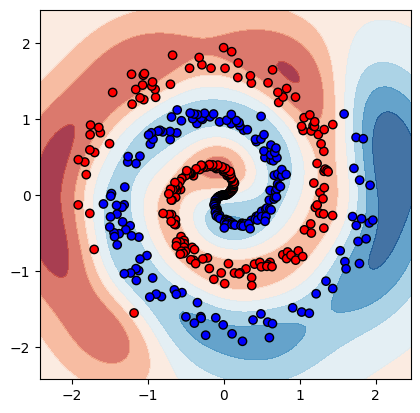

In [5]:
from matplotlib.colors import ListedColormap

DecisionBoundaryDisplay.from_estimator(model, X, cmap=plt.cm.RdBu, alpha=0.8, eps=0.5)
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.axis('image')